In [2]:
import pandas as pd
from scipy.stats import pearsonr
import hvplot.pandas  
import matplotlib.pyplot as plt
# Import your data into Python
df = pd.read_csv("PCE_GDB9.csv")

df

,smiles_key,smiles,mol,HOMO(eV),LUMO(eV),GAP(eV),HOMO_xtb(eV),LUMO_xtb(eV),GAP_xtb(eV),Gap_calibrated,...,lumo_calibrated,voc_pcbm(V),jsc_pcbm(A.m-2),pce_pcbm(%),voc_pcdtbt(V),jsc_pcdtbt(A.m-2),pce_pcdtbt(%),sas1(%),pce_pcbm_sas(%),pce_pcdtbt_sas(%)
0,gdb 5,C#N,<rdkit.Chem.rdchem.Mol object at 0x788d81a32c80>,-9.806984,0.519737,10.329442,-12.2419,-6.2921,5.949769,5.580178,...,-1.738135,2.718313,0.000701,0.000138,3.461865,0.0,0.0,6.637111,-6.636973,-6.637111
1,gdb 6,C=O,<rdkit.Chem.rdchem.Mol object at 0x788d81a17b30>,-7.265440,-1.104782,6.157937,-11.5341,-7.9137,3.620361,3.585286,...,-3.163175,2.148461,1.762480,0.273436,2.036825,0.0,0.0,7.258523,-6.985087,-7.258523
2,gdb 10,CC#N,<rdkit.Chem.rdchem.Mol object at 0x788d81a25ba0>,-8.881796,1.023148,9.904945,-11.6114,-5.5012,6.110195,5.767593,...,-1.043103,2.210696,0.000282,0.000045,4.156897,0.0,0.0,6.909125,-6.909080,-6.909125
3,gdb 11,CC=O,<rdkit.Chem.rdchem.Mol object at 0x788d81a1c970>,-6.911692,-0.538785,6.372907,-11.1422,-7.2008,3.941405,3.896253,...,-2.536688,1.832941,0.650831,0.086143,2.663312,0.0,0.0,7.149697,-7.063554,-7.149697
4,gdb 12,NC=O,<rdkit.Chem.rdchem.Mol object at 0x788d81a25e40>,-6.919855,0.821784,7.741639,-11.0634,-5.9171,5.146301,4.960909,...,-1.408590,1.769499,0.011477,0.001466,3.791410,0.0,0.0,6.909742,-6.908276,-6.909742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13874,gdb 19744,C1OC2C3C=CC2C13,<rdkit.Chem.rdchem.Mol object at 0x788d8156f820>,-6.046370,0.302046,6.351137,-10.4530,-5.9856,4.467424,4.409277,...,-1.468787,1.278064,0.104972,0.009688,3.731213,0.0,0.0,8.280487,-8.270800,-8.280487
13875,gdb 19748,O=C1C2C3CC1CC23,<rdkit.Chem.rdchem.Mol object at 0x788d8156fe40>,-6.291272,-0.125172,6.166100,-10.6261,-6.7944,3.831790,3.837878,...,-2.179550,1.417428,0.789639,0.080823,3.020450,0.0,0.0,8.077732,-7.996910,-8.077732
13876,gdb 19749,O=C1C2C3CC1CN23,<rdkit.Chem.rdchem.Mol object at 0x788d8157eeb0>,-6.530733,-0.582324,5.951130,-10.7075,-7.2342,3.473324,3.516923,...,-2.566040,1.482963,2.169785,0.232354,2.633960,0.0,0.0,8.105251,-7.872896,-8.105251
13877,gdb 19750,O=C1C2C3CC1OC23,<rdkit.Chem.rdchem.Mol object at 0x788d815bab30>,-6.171542,-0.525180,5.643641,-10.6997,-7.2849,3.414833,3.466089,...,-2.610594,1.476683,2.525985,0.269353,2.589406,0.0,0.0,7.931176,-7.661823,-7.931176


In [3]:
from scipy.stats import linregress


In [4]:
import seaborn as sns

Pearsons correlation: 0.803


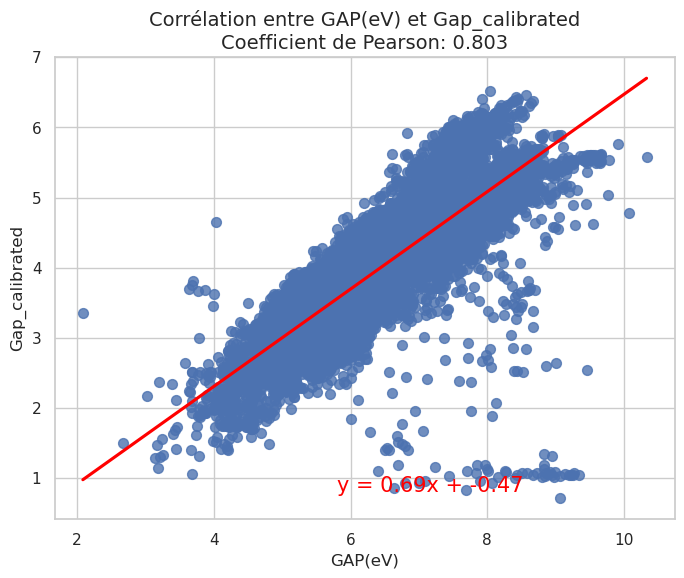

In [5]:
import seaborn as sns

# Convert dataframe into series
list1 = df['GAP(eV)']
list2 = df['Gap_calibrated']

# Apply the pearsonr()
pearson_coef, p_value = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % pearson_coef)
# Tracer la corrélation avec Seaborn
sns.set(style="whitegrid")

# Création du graphique de corrélation
plt.figure(figsize=(8, 6))
sns.regplot(x='GAP(eV)', y='Gap_calibrated', data=df, ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})
(slope, intercept, rvalue, pvalue, stderr) = linregress(list1, list2)
regress_values = list1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Ajout du coefficient de corrélation dans le titre
plt.title(f'Corrélation entre GAP(eV) et Gap_calibrated\nCoefficient de Pearson: {pearson_coef:.3f}', fontsize=14)
plt.xlabel('GAP(eV)', fontsize=12)
plt.ylabel('Gap_calibrated', fontsize=12)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# Afficher le graphique
plt.show()

In [7]:
df1 = pd.read_csv("new_xtb.csv")

df1

,Unnamed: 0,smiles,mol,HOMO(eV),LUMO(eV),GAP(eV),HOMO_xtb(eV),LUMO_xtb(eV),GAP_xtb(eV),GAP_NEW_xtb(eV),MO_NEWS_DIP_xtb(eV),HOMO_NEW_xtb(eV),LUMO__NEW_xtb(eV)
0,gdb 1,C,<rdkit.Chem.rdchem.Mol object at 0x788d81a32e40>,-10.549854,3.186453,13.736308,-12.7202,4.6329,17.353095,17.371331,0.000,-12.7209,4.6504
1,gdb 2,N,<rdkit.Chem.rdchem.Mol object at 0x788d81a32dd0>,-6.993326,2.255824,9.249150,-10.5031,1.7297,12.232824,12.228448,1.785,-10.5057,1.7228
2,gdb 3,O,<rdkit.Chem.rdchem.Mol object at 0x788d81a3bc10>,-7.967494,1.869422,9.836916,-12.1467,2.2396,14.386316,14.400019,2.217,-12.1473,2.2527
3,gdb 4,C#C,<rdkit.Chem.rdchem.Mol object at 0x788d81a3bba0>,-7.741639,1.376896,9.118535,-11.5117,-4.2239,7.287776,7.287338,0.001,-11.5117,-4.2243
4,gdb 5,C#N,<rdkit.Chem.rdchem.Mol object at 0x788d81a32c80>,-9.806984,0.519737,10.329442,-12.2419,-6.2921,5.949769,5.950189,2.622,-12.2418,-6.2916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,gdb 1022,N#CC1=CNC=N1,<rdkit.Chem.rdchem.Mol object at 0x788db800e4a0>,-6.906250,-0.541507,6.364743,-10.9542,-6.9272,4.027010,4.027084,7.260,-10.9549,-6.9278
992,gdb 1023,N#CC1=COC=C1,<rdkit.Chem.rdchem.Mol object at 0x788db800e2e0>,-6.987884,-0.892533,6.095350,-11.4673,-7.1812,4.286087,4.285117,3.800,-11.4672,-7.1821
993,gdb 1024,N#CC1=COC=N1,<rdkit.Chem.rdchem.Mol object at 0x788db800e510>,-7.548438,-1.287099,6.264061,-11.7120,-7.6724,4.039603,4.040625,4.496,-11.7128,-7.6722
994,gdb 1025,O=CC1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x788db800e970>,-6.242292,-1.172811,5.069481,-10.8325,-7.5870,3.245417,3.245955,3.036,-10.8326,-7.5866


Pearsons correlation: 0.986


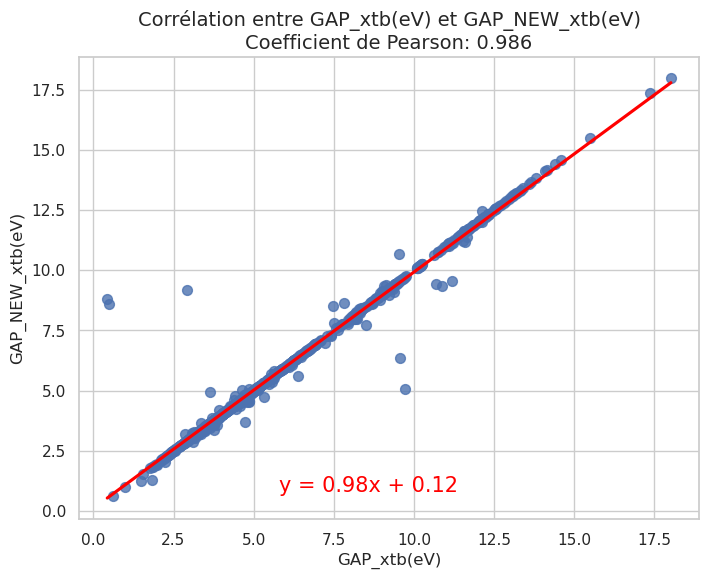

In [8]:
import seaborn as sns

# Convert dataframe into series
list1 = df1['GAP_xtb(eV)']
list2 = df1['GAP_NEW_xtb(eV)']

# Apply the pearsonr()
pearson_coef, p_value = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % pearson_coef)
# Tracer la corrélation avec Seaborn
sns.set(style="whitegrid")

# Création du graphique de corrélation
plt.figure(figsize=(8, 6))
sns.regplot(x='GAP_xtb(eV)', y='GAP_NEW_xtb(eV)', data=df, ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})
(slope, intercept, rvalue, pvalue, stderr) = linregress(list1, list2)
regress_values = list1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Ajout du coefficient de corrélation dans le titre
plt.title(f'Corrélation entre GAP_xtb(eV) et GAP_NEW_xtb(eV)\nCoefficient de Pearson: {pearson_coef:.3f}', fontsize=14)
plt.xlabel('GAP_xtb(eV)', fontsize=12)
plt.ylabel('GAP_NEW_xtb(eV)', fontsize=12)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# Afficher le graphique
plt.show()

Pearsons correlation: 0.870


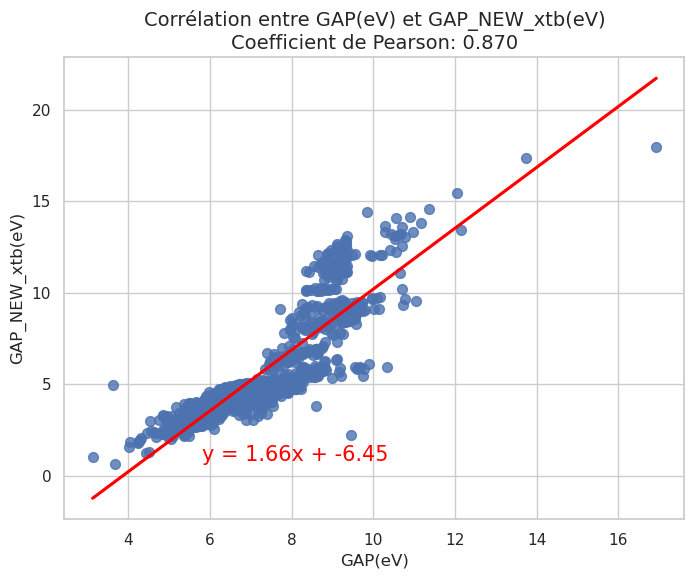

In [9]:
import seaborn as sns

# Convert dataframe into series
list1 = df1['GAP(eV)']
list2 = df1['GAP_NEW_xtb(eV)']

# Apply the pearsonr()
pearson_coef, p_value = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % pearson_coef)
# Tracer la corrélation avec Seaborn
sns.set(style="whitegrid")

# Création du graphique de corrélation
plt.figure(figsize=(8, 6))
sns.regplot(x='GAP(eV)', y='GAP_NEW_xtb(eV)', data=df, ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})
(slope, intercept, rvalue, pvalue, stderr) = linregress(list1, list2)
regress_values = list1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Ajout du coefficient de corrélation dans le titre
plt.title(f'Corrélation entre GAP(eV) et GAP_NEW_xtb(eV)\nCoefficient de Pearson: {pearson_coef:.3f}', fontsize=14)
plt.xlabel('GAP(eV)', fontsize=12)
plt.ylabel('GAP_NEW_xtb(eV)', fontsize=12)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# Afficher le graphique
plt.show()

Pearsons correlation: 0.863


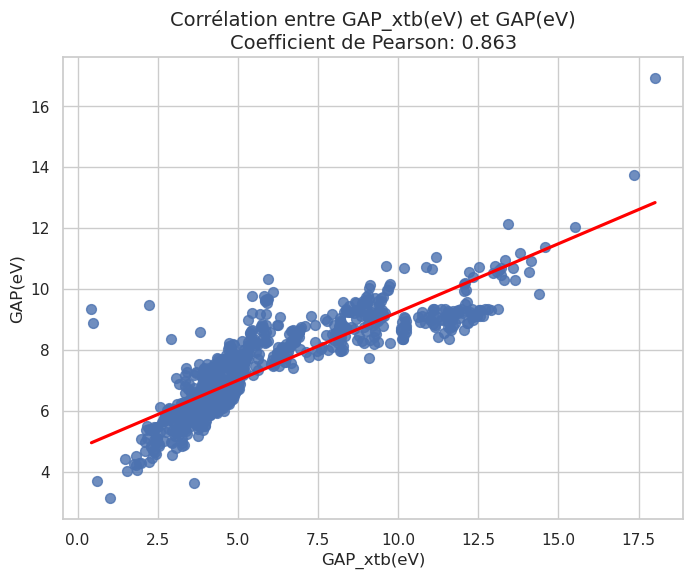

In [10]:
import seaborn as sns

# Convert dataframe into series
list1 = df1['GAP_xtb(eV)']
list2 = df1['GAP(eV)']

# Apply the pearsonr()
pearson_coef, p_value = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % pearson_coef)
# Tracer la corrélation avec Seaborn
sns.set(style="whitegrid")

# Création du graphique de corrélation
plt.figure(figsize=(8, 6))
sns.regplot(x='GAP_xtb(eV)', y='GAP(eV)', data=df, ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})
(slope, intercept, rvalue, pvalue, stderr) = linregress(list1, list2)
regress_values = list1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Ajout du coefficient de corrélation dans le titre
plt.title(f'Corrélation entre GAP_xtb(eV) et GAP(eV)\nCoefficient de Pearson: {pearson_coef:.3f}', fontsize=14)
plt.xlabel('GAP_xtb(eV)', fontsize=12)
plt.ylabel('GAP(eV)', fontsize=12)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# Afficher le graphique
plt.show()

In [5]:
df1=df

In [24]:
df=df1.iloc[0:200,:]

In [25]:
# Calculer la différence entre les deux listes
# for i in range(len(df)):
#     df.at[i,'diff_Gap(eV)'] =  df.at[i,'GAP(eV)'] - df.at[i,'Gap_calibrated']
# for i in range(len(df)):
#     dif_gap = abs(df2.at[i,"Gap_calibrated"] - df.at[i, 'gap(eV)'])
# # Tracer les graphiques
pat = df.hvplot(x='index', y=['GAP(eV)', 'GAP_xtb(eV)','GAP_NEW_xtb(eV)'], rot=90, title='Comparaison des valeurs de GAP en électrons volts', grid=True)
pat
# fig

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [8]:

# fig


In [9]:
import plotly.graph_objects as go

# Calculer la différence entre les deux listes
difference = [a - b for a, b in zip(list1, list2)] 
# Créer le graphique
fig = go.Figure()

# Tracer la première liste
fig.add_trace(go.Scatter(x=df.index, y=list1, mode='lines', name='GAP(eV)'))

# Tracer la deuxième liste
fig.add_trace(go.Scatter(x=df.index, y=list2, mode='lines', name='Gap_calibrated'))

# Ajouter le tracé de la différence
fig.add_trace(go.Scatter(x=df.index, y=difference, mode='lines', name='Différence'))

# Personnaliser le graphique
fig.update_layout(
    title='Comparaison des valeurs de GAP en electrons volts',
    xaxis_title='Index',
    yaxis_title='Valeur (eV)',
    legend_title='Légende'
)

# Afficher le graphique
fig.show()

In [12]:
df_acc1 = df1.loc[df1["pce_pcbm(%)"] > 10.0, :]
df_acc2=df_acc1.iloc[:,12:15]
df_1=df_acc1.iloc[:,0]
df_acc=pd.concat([df_1,df_acc2], axis=1)
df_acc

,smiles_key,voc_pcbm(V),jsc_pcbm(A.m-2),pce_pcbm(%)
4735,gdb 6267,0.801604,175.082965,10.134623


In [13]:
#df_acc['jsc_pcbm'] = df_acc['jsc_pcbm'] /1.0

# Tracer la figure avec les modifications
plot = df_acc.hvplot(
    y=['voc_pcbm(V)', 'jsc_pcbm(A.m-2)', 'pce_pcbm(%)'], 
    title='Parametre du model de Scharber pcbm', 
    grid=True
)

plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:

# hv = df_acc.hvplot()
# hv
df_acc.hvplot( y=['voc_pcbm', 'jsc_pcbm','pce_pcbm'], title='Parametre du model de Scharber pce_pcbm ', grid=True)


In [13]:
df_don1 = df1.loc[df1["pce_pcdtbt(%)"] > 10.0, :]
df_don2=df_don1.iloc[:,15:18]
df_2=df_don1.iloc[:,0]
df_don=pd.concat([df_2,df_don2], axis=1)
df_don

,smiles_key,voc_pcdtbt(V),jsc_pcdtbt(A.m-2),pce_pcdtbt(%)
442,gdb 723,0.655197,269.284128,12.740492
1084,gdb 1499,1.170517,119.004741,10.058789
1506,gdb 2124,1.096699,128.336892,10.163485
3693,gdb 5046,1.256990,117.668882,10.680633
3696,gdb 5049,0.901960,167.286997,10.895650
4735,gdb 6267,1.252772,175.082965,15.838696
4741,gdb 6273,1.143978,186.264921,15.386942
5491,gdb 7335,1.019805,168.221262,12.388017
5859,gdb 7902,1.139057,152.216134,12.520153
6389,gdb 8759,1.278169,117.823835,10.874891


In [17]:
df_don.hvplot(y=['voc_pcdtbt(V)', 'jsc_pcdtbt(A.m-2)','pce_pcdtbt(%)'], title='Parametre du model de Scharber pce_pcbm ', grid=True)


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [49]:
pat2= df_acc1.hvplot( y=['pce_pcbm_sas(%)', 'pce_pcdtbt_sas(%)'], title='SAscore des des  accepteurs pcbm et des  des donneurs pce_pcbm', grid=True)
pat2

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [16]:
pat1 = df_don1.hvplot( y=['pce_pcbm_sas(%)', 'pce_pcdtbt_sas(%)'], title='SAscore des des  accepteurs pcbm et des  des donneurs pce_pcbm', grid=True)
pat1

:NdOverlay   [Variable]
   :Curve   [index]   (value)